# Etude sur Alien vs. Predator - épisode 3

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

### 1 - import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des donnés

In [3]:
feature_test = np.load('feature_test.npy')
y_test = np.load('y_test.npy')

### 4 - charger le modele VGG-16

In [4]:
model = load_model('best_model_ep3')

### 5 - prediction

In [5]:
y_test_pred = model.predict(feature_test)

In [1]:
#y_test_pred

In [7]:
y_test_pred  = y_test_pred > 0.5

In [2]:
#y_test_pred

### matrix de confusion

In [9]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[86, 14],
       [ 1, 99]], dtype=int64)

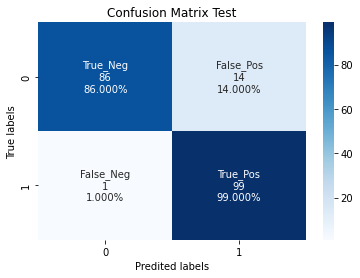

In [10]:
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

In [11]:
from sklearn.metrics import classification_report

In [12]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.99      0.86      0.92       100
  Predator 1       0.88      0.99      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [13]:
accuracy_score_keras = tensorflow.keras.metrics.BinaryAccuracy()
accuracy_score_keras.update_state(y_test, y_test_pred)
print(accuracy_score_keras.result().numpy())

0.925


### Courbe ROC, AUC

In [15]:
AUC_keras = tensorflow.keras.metrics.AUC()
AUC_keras.update_state(y_test, y_test_pred)
AUC_keras.result().numpy()

0.925

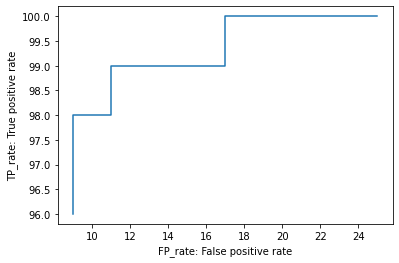

In [16]:
#COURBE ROC

FP_rate = []
TP_rate = []

for seuil in AUC_keras.thresholds[1:-1] :
    FP_rate_seuil = tensorflow.keras.metrics.FalsePositives(thresholds=seuil)
    FP_rate_seuil.update_state(y_test, model.predict(feature_test).flatten())
    
    FP_rate.append(FP_rate_seuil.result().numpy())
    
    
    TP_rate_seuil = tensorflow.keras.metrics.TruePositives(thresholds=seuil)
    TP_rate_seuil.update_state(y_test, model.predict(feature_test).flatten())
    
    TP_rate.append(TP_rate_seuil.result().numpy())

    
    
#print(TP_rate)
#print(FP_rate)
    
fig = plt.figure()
plt.plot(FP_rate, TP_rate)
plt.xlabel('FP_rate: False positive rate')
plt.ylabel('TP_rate: True positive rate')
plt.show()   

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.925


In [19]:
auc = auc(fpr, tpr)

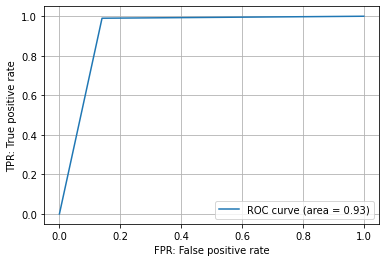

In [20]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

#### Observation :
    J'ai obtenu accuracy 0.93 pour le test avec vgg-16

#オリジナルの画像からデータセットを作成する方法 

https://intellectual-curiosity.tokyo/2019/07/02/%E3%82%AA%E3%83%AA%E3%82%B8%E3%83%8A%E3%83%AB%E3%81%AE%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%E6%96%B9/

https://child-programmer.com/ai/cnn-originaldataset-samplecode-description/

https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17

matplotlibのcmap(colormap)パラメータ
https://beiznotes.org/matplot-cmap-list/